In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_palette("Set2")
sns.set_theme(style="whitegrid", font_scale=1.6)

## Tendency Patterns, with Regression Coef. and Signi. (Base Gap)

In [3]:
basegap_o = pd.read_csv("lme_results/offensive_basegap_ci_results.csv")
basegap_o['label'] = basegap_o['label'].apply(lambda x: x.capitalize())
basegap_p = pd.read_csv("lme_results/polite_basegap_ci_results.csv")
basegap_p['label'] = basegap_p['label'].apply(lambda x: x.capitalize())

basegap_o_gender = basegap_o[basegap_o['label']=='Woman']
basegap_p_gender = basegap_p[basegap_p['label']=='Woman']

options = ['Black', 'Asian']
basegap_o_ethnicity = basegap_o.loc[basegap_o['label'].isin(options)]
basegap_p_ethnicity = basegap_p.loc[basegap_p['label'].isin(options)]

In [4]:
def add_star(p):
    sig = ' '
    if p < 0.05:
        sig = '*'
    if p < 0.01:
        sig = '**'
    if p < 0.001:
        sig = '***'
   
    return sig

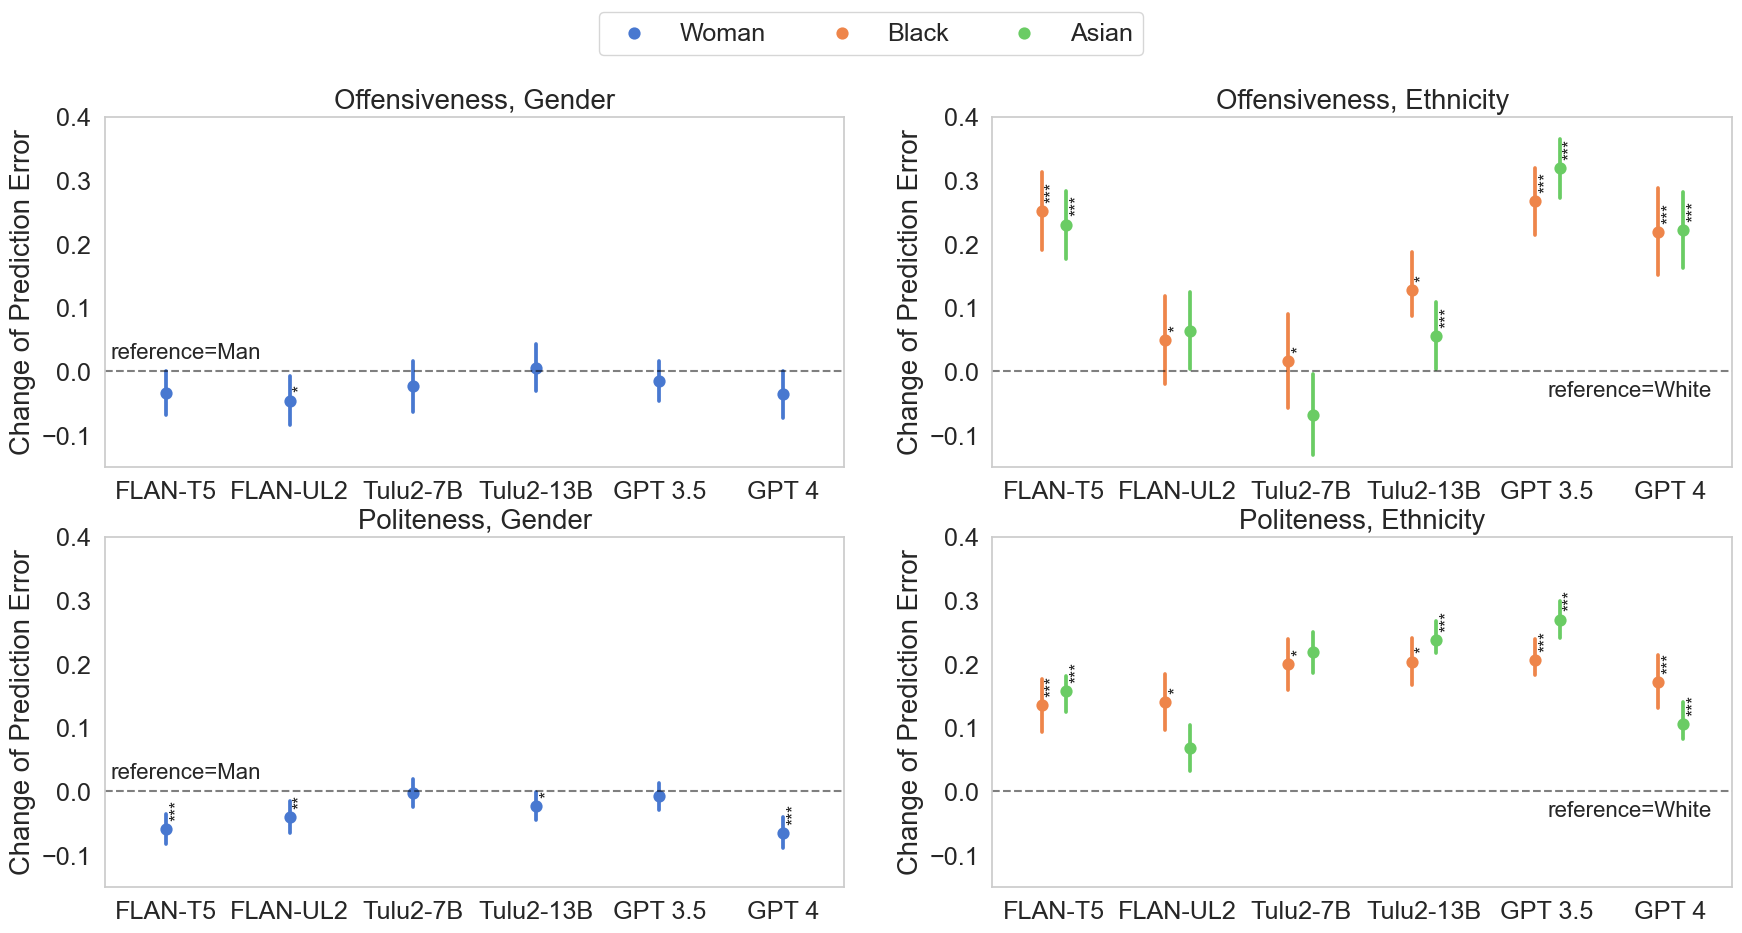

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(21, 10))

col1 = ['#4878d0', '#ee854a', '#6acc64', '#dc7ec0', '#797979', '#d5bb67', '#82c6e2']
col2 = ['#ee854a', '#6acc64', '#8c613c', '#dc7ec0', '#797979', '#d5bb67', '#82c6e2']

(sns.pointplot(data=basegap_o_gender, ax=axes[0, 0],
              x='model', y='coef', hue='label',
              errorbar=(lambda x: (x.min(), x.max())),
              palette=col1, linestyles='none', dodge=.3)
.set(title="Offensiveness, Gender", xlabel="", ylabel="Change of Prediction Error"))

(sns.pointplot(data=basegap_o_ethnicity, ax=axes[0, 1],
              x='model', y='coef', hue='label',
              errorbar=(lambda x: (x.min(), x.max())),
              palette=col2, linestyles='none', dodge=.2)
.set(title="Offensiveness, Ethnicity", xlabel="", ylabel="Change of Prediction Error"))

(sns.pointplot(data=basegap_p_gender, ax=axes[1, 0],
              x='model', y='coef', hue='label',
              errorbar=(lambda x: (x.min(), x.max())),
              palette=col1, linestyles='none', dodge=.3)
.set(title="Politeness, Gender", xlabel="", ylabel="Change of Prediction Error"))

(sns.pointplot(data=basegap_p_ethnicity, ax=axes[1, 1],
              x='model', y='coef', hue='label',
              errorbar=(lambda x: (x.min(), x.max())),
              palette=col2, linestyles='none', dodge=.2)
.set(title="Politeness, Ethnicity", xlabel="", ylabel="Change of Prediction Error"))

for ax in axes.flat:
    ax.set_xticklabels(labels=["FLAN-T5", "FLAN-UL2", "Tulu2-7B", "Tulu2-13B", "GPT 3.5", "GPT 4"])
    ax.get_legend().remove()
    ax.grid(False)
    ax.set_ylim(-0.15, 0.4)
    ax.axhline(y=0, color='black', linestyle='dashed', alpha=.5)

axes[0,0].annotate("reference=Man", (-0.45,0.02), fontsize=16)
axes[1,0].annotate("reference=Man", (-0.45,0.02), fontsize=16)
axes[0,1].annotate("reference=White", (4,-0.04), fontsize=16)
axes[1,1].annotate("reference=White", (4,-0.04), fontsize=16)

handles1, labels1 = axes[0,0].get_legend_handles_labels()
handles2, labels2 = axes[0,1].get_legend_handles_labels()
labels = ['Woman', 'Black', 'Asian']
fig.legend(handles1+handles2, labels, loc='upper center', ncol=3)


plot_dfs = [basegap_o_gender, basegap_o_ethnicity, basegap_p_gender, basegap_o_ethnicity]

for i in range(0, len(axes.flat)):
    plot_df = plot_dfs[i]
    plot_df = plot_df.drop_duplicates(subset=['model', 'label'], keep='first')
    if i%2 != 0:
        plot_df = plot_df.sort_values(by='label', ascending=False)
        pvalues = plot_df['p'].to_list()
        x_values = np.ma.append([path.get_offsets()[:,0] for path in axes.flat[i].collections][0],
                                [path.get_offsets()[:,0] for path in axes.flat[i].collections][1]).tolist()
        y_values = np.ma.append([path.get_offsets()[:,1] for path in axes.flat[i].collections][0],
                                [path.get_offsets()[:,1] for path in axes.flat[i].collections][1]).tolist()
    else:
        pvalues = plot_df['p'].to_list()
        x_values = [path.get_offsets()[:,0] for path in axes.flat[i].collections][0].tolist()
        y_values = [path.get_offsets()[:,1] for path in axes.flat[i].collections][0].tolist()
    sigs = [add_star(p) for p in pvalues]

    for j, sig in enumerate(sigs):
        axes.flat[i].annotate(sig, (x_values[j]+0.02, y_values[j]+0.02), 
                              rotation=90, fontsize=13)

plt.savefig("plots/plot_v2_base_gap.pdf", format='pdf')

## Effect of Adding Identity in Prompt

In [14]:
addgap_o = pd.read_csv("lme_results/offensive_addgap_ci_results.csv")
addgap_o['label'] = addgap_o['label'].apply(lambda x: x.capitalize())
addgap_p = pd.read_csv("lme_results/polite_addgap_ci_results.csv")
addgap_p['label'] = addgap_p['label'].apply(lambda x: x.capitalize())

options = ['Man', 'Woman']
addgap_o_gender = addgap_o[addgap_o['label'].isin(options)]
addgap_p_gender = addgap_p[addgap_p['label'].isin(options)]

options = ['White', 'Black', 'Asian']
addgap_o_ethnicity = addgap_o.loc[addgap_o['label'].isin(options)]
addgap_p_ethnicity = addgap_p.loc[addgap_p['label'].isin(options)]

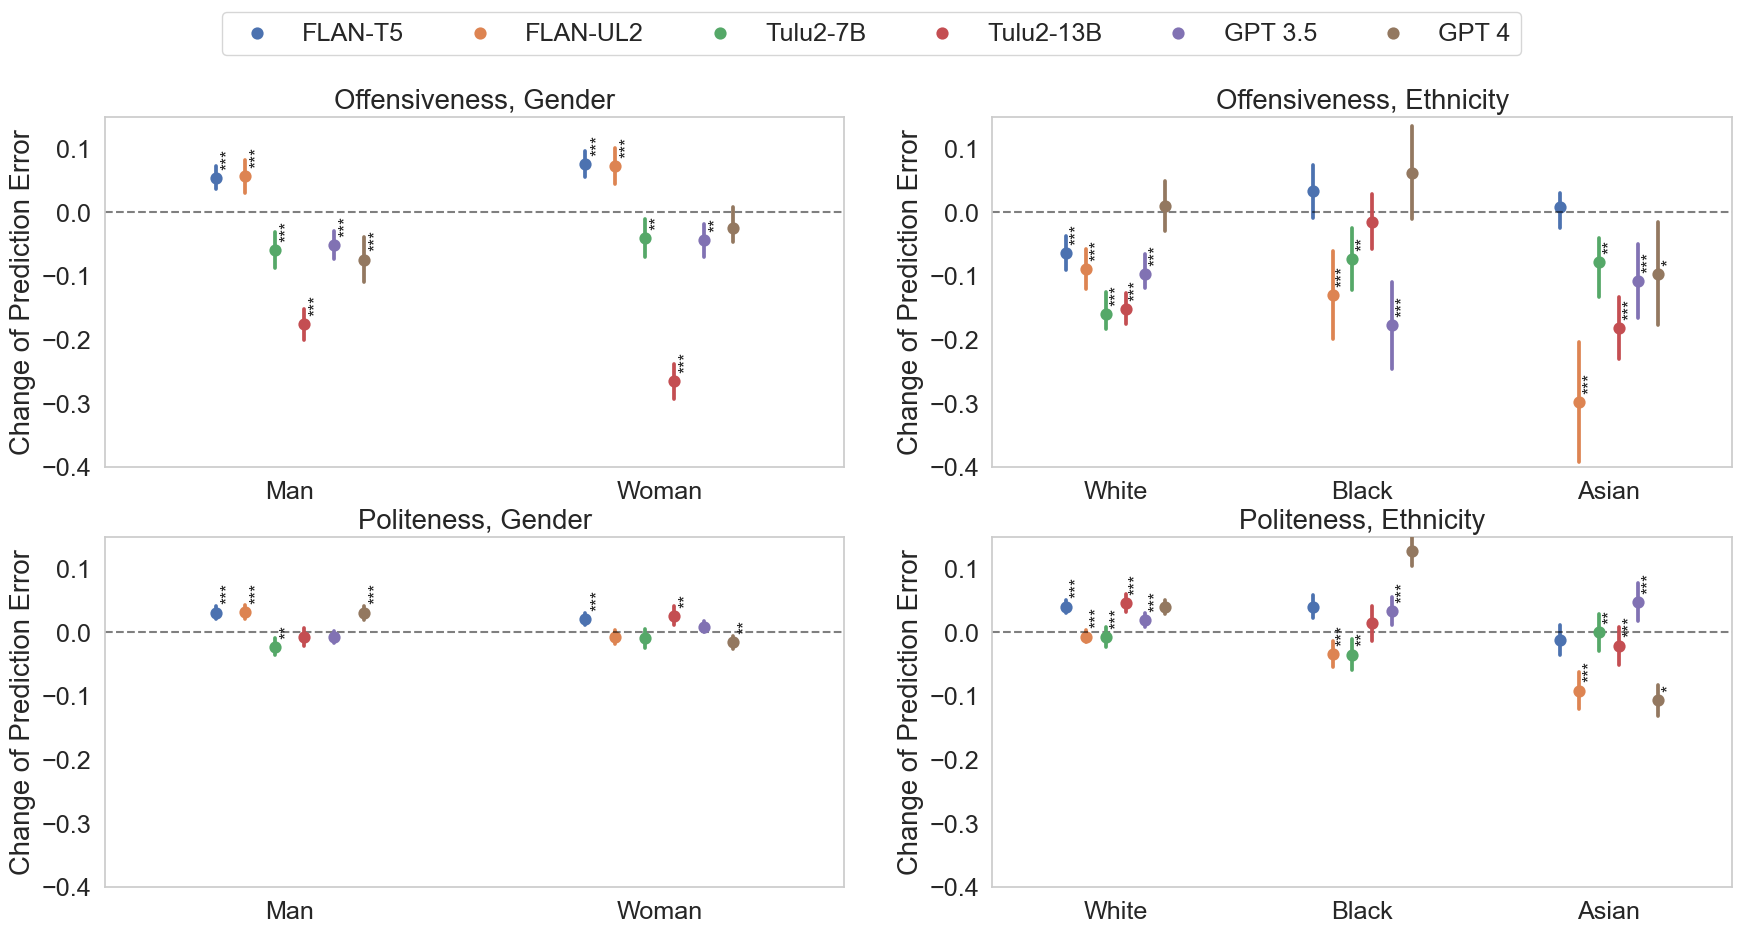

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(21, 10))

(sns.pointplot(data=addgap_o_gender, ax=axes[0, 0],
              x='label', y='coef', hue='model',
              errorbar=(lambda x: (x.min(), x.max())),
              palette='deep', linestyles='none', dodge=.4)
.set(title="Offensiveness, Gender", xlabel="", ylabel="Change of Prediction Error"))

(sns.pointplot(data=addgap_o_ethnicity, ax=axes[0, 1],
              x='label', y='coef', hue='model',
              errorbar=(lambda x: (x.min(), x.max())),
              palette='deep', linestyles='none', dodge=.4)
.set(title="Offensiveness, Ethnicity", xlabel="", ylabel="Change of Prediction Error"))

(sns.pointplot(data=addgap_p_gender, ax=axes[1, 0],
              x='label', y='coef', hue='model',
              errorbar=(lambda x: (x.min(), x.max())),
              palette='deep', linestyles='none', dodge=.4)
.set(title="Politeness, Gender", xlabel="", ylabel="Change of Prediction Error"))

(sns.pointplot(data=addgap_p_ethnicity, ax=axes[1, 1],
              x='label', y='coef', hue='model',
              errorbar=(lambda x: (x.min(), x.max())),
              palette='deep', linestyles='none', dodge=.4)
.set(title="Politeness, Ethnicity", xlabel="", ylabel="Change of Prediction Error"))

for ax in axes.flat:
    #ax.set_xticklabels(labels=["FLAN-T5", "FLAN-UL2", "Tulu2-7B", "Tulu2-13B", "GPT 3.5", "GPT 4"])
    ax.get_legend().remove()
    ax.grid(False)
    ax.set_ylim(-0.4, 0.15)
    ax.axhline(y=0, color='black', linestyle='dashed', alpha=.5)

handles, labels = axes[0,0].get_legend_handles_labels()
handles = handles
labels = ['FLAN-T5', 'FLAN-UL2', "Tulu2-7B", "Tulu2-13B", 'GPT 3.5', 'GPT 4']
fig.legend(handles, labels, loc='upper center', ncol=6)


plot_dfs = [addgap_o_gender, addgap_o_ethnicity, addgap_p_gender, addgap_o_ethnicity]

for i in range(0, len(axes.flat)):
    plot_df = plot_dfs[i]
    plot_df = plot_df.drop_duplicates(subset=['model', 'label'], keep='first')
    pvalues = plot_df['p'].to_list()
    x_values = np.ma.concatenate([[path.get_offsets()[:,0] for path in axes.flat[i].collections][0],
                                [path.get_offsets()[:,0] for path in axes.flat[i].collections][1],
                                [path.get_offsets()[:,0] for path in axes.flat[i].collections][2],
                                [path.get_offsets()[:,0] for path in axes.flat[i].collections][3],
                                [path.get_offsets()[:,0] for path in axes.flat[i].collections][4],
                                [path.get_offsets()[:,0] for path in axes.flat[i].collections][5]]).tolist()
    y_values = np.ma.concatenate([[path.get_offsets()[:,1] for path in axes.flat[i].collections][0],
                                [path.get_offsets()[:,1] for path in axes.flat[i].collections][1],
                                [path.get_offsets()[:,1] for path in axes.flat[i].collections][2],
                                [path.get_offsets()[:,1] for path in axes.flat[i].collections][3],
                                [path.get_offsets()[:,1] for path in axes.flat[i].collections][4],
                                [path.get_offsets()[:,1] for path in axes.flat[i].collections][5]]).tolist()
    sigs = [add_star(p) for p in pvalues]

    for j, sig in enumerate(sigs):
        axes.flat[i].annotate(sig, (x_values[j]+0.01, y_values[j]+0.02),
                              fontsize=13, rotation=90)

plt.savefig("plots/plot_v2_add_gap.pdf", format='pdf')